<a href="https://colab.research.google.com/github/emailsri23/INSAID/blob/my_ml2_Jan2020/ml2_K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture #For GMM clustering
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
review_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/Womens%20Clothing%20E-Commerce%20Reviews.csv")
review_data.dropna(inplace=True)
#review_data=review_data.drop(['Unnamed: 0', 'Clothing ID'],axis=1)
print(review_data.dtypes)
review_data.head(5)

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [4]:
!wget https://raw.githubusercontent.com/abromberg/sentiment_analysis/master/AFINN/AFINN-111.txt

--2020-02-01 11:32:29--  https://raw.githubusercontent.com/abromberg/sentiment_analysis/master/AFINN/AFINN-111.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28093 (27K) [text/plain]
Saving to: ‘AFINN-111.txt’

AFINN-111.txt       100%[===================>]  27.43K  --.-KB/s    in 0.007s  

2020-02-01 11:32:29 (3.71 MB/s) - ‘AFINN-111.txt’ saved [28093/28093]



In [0]:
# remove all the columns that are categorical variables
review_data_k_means=review_data.drop(['Unnamed: 0', 'Clothing ID','Class Name','Department Name','Title','Division Name','Recommended IND'],axis=1)

In [0]:
with open("AFINN-111.txt",'rb') as fp:
  data = fp.read()

In [10]:
data

b"abandon\t-2\nabandoned\t-2\nabandons\t-2\nabducted\t-2\nabduction\t-2\nabductions\t-2\nabhor\t-3\nabhorred\t-3\nabhorrent\t-3\nabhors\t-3\nabilities\t2\nability\t2\naboard\t1\nabsentee\t-1\nabsentees\t-1\nabsolve\t2\nabsolved\t2\nabsolves\t2\nabsolving\t2\nabsorbed\t1\nabuse\t-3\nabused\t-3\nabuses\t-3\nabusive\t-3\naccept\t1\naccepted\t1\naccepting\t1\naccepts\t1\naccident\t-2\naccidental\t-2\naccidentally\t-2\naccidents\t-2\naccomplish\t2\naccomplished\t2\naccomplishes\t2\naccusation\t-2\naccusations\t-2\naccuse\t-2\naccused\t-2\naccuses\t-2\naccusing\t-2\nache\t-2\nachievable\t1\naching\t-2\nacquit\t2\nacquits\t2\nacquitted\t2\nacquitting\t2\nacrimonious\t-3\nactive\t1\nadequate\t1\nadmire\t3\nadmired\t3\nadmires\t3\nadmiring\t3\nadmit\t-1\nadmits\t-1\nadmitted\t-1\nadmonish\t-2\nadmonished\t-2\nadopt\t1\nadopts\t1\nadorable\t3\nadore\t3\nadored\t3\nadores\t3\nadvanced\t1\nadvantage\t2\nadvantages\t2\nadventure\t2\nadventures\t2\nadventurous\t2\naffected\t-1\naffection\t3\naffecti

In [11]:
str(data).split("\\n")[100].split("\\t")

['alarm', '-2']

In [0]:
# str(data).split("\\n")[10].split("\\t")
#!wget https://raw.githubusercontent.com/abromberg/sentiment_analysis/master/AFINN/AFINN-111.txt
d= {}

for each_element in str(data).split("\\n"):
  d[each_element.split("\\t")[0]] = each_element.split("\\t")[1]

In [13]:
d['abducted']

'-2'

In [14]:
int(d['accusing'])

-2

In [0]:
eachRow = review_data['Review Text'].iloc[0]

In [0]:
import numpy as np
def getSentiment(eachRow):
  TotalSum = []
  for eachWord in eachRow.split():
    if eachWord in d:   # if it is found in the dictionary 
      TotalSum.append(int(d[eachWord]))
  return np.sum(TotalSum)
  # return TotalSum

review_data['Sentiment'] = review_data['Review Text'].apply(getSentiment)

In [23]:
review_data[['Review Text','Sentiment']]

,Review Text,Sentiment
2,I had such high hopes for this dress and reall...,7.0
3,"I love, love, love this jumpsuit. it's fun, fl...",6.0
4,This shirt is very flattering to all due to th...,6.0
5,"I love tracy reese dresses, but this one is no...",7.0
6,I aded this in my basket at hte last mintue to...,1.0
...,...,...
23481,I was very happy to snag this dress at such a ...,6.0
23482,"It reminds me of maternity clothes. soft, stre...",2.0
23483,"This fit well, but the top was very see throug...",6.0
23484,I bought this dress for a wedding i have this ...,6.0


In [24]:
review_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,7.0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,6.0
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,6.0
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,7.0
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1.0


In [28]:

## adding the minimum value of sentiment score so as to remove negative sentiment scores


import pickle

with open("sent.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

review_data_k_means['sent_score'] = b

min_sent = abs(np.min(review_data_k_means['sent_score']))
review_data_k_means['sent_score'] =  review_data_k_means['sent_score'] + abs(np.min(review_data_k_means['sent_score']))
review_data_k_means.drop('Review Text',axis=1,inplace=True)

FileNotFoundError: ignored

In [20]:
review_data_k_means.head()

,Age,Review Text,Rating,Positive Feedback Count
2,60,I had such high hopes for this dress and reall...,3,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,0
4,47,This shirt is very flattering to all due to th...,5,6
5,49,"I love tracy reese dresses, but this one is no...",2,4
6,39,I aded this in my basket at hte last mintue to...,5,1


TypeError: ignored

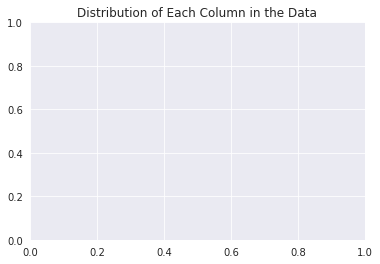

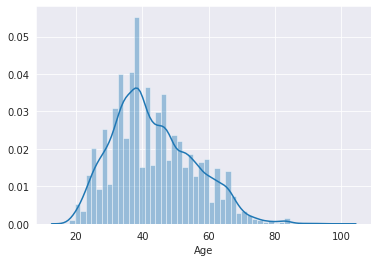

In [21]:
sns.set_style('darkgrid')
plt.title('Distribution of Each Column in the Data')

for i,col in enumerate(review_data_k_means.columns):
    plt.figure(i)
    sns.distplot(review_data_k_means[col])